<a href="https://colab.research.google.com/github/dikshantdhanawade/deeplearning_clg/blob/main/Exp3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

def create_model(lr=0.01):
    model = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model_fixed = create_model(lr=0.01)

history_fixed = model_fixed.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=128
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8671 - loss: 0.4146 - val_accuracy: 0.9551 - val_loss: 0.1534
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9608 - loss: 0.1276 - val_accuracy: 0.9644 - val_loss: 0.1335
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9715 - loss: 0.0953 - val_accuracy: 0.9591 - val_loss: 0.1468
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9731 - loss: 0.0851 - val_accuracy: 0.9663 - val_loss: 0.1287
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9701 - val_loss: 0.1311
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9808 - loss: 0.0688 - val_accuracy: 0.9683 - val_loss: 0.1331
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9825 - loss: 0.0609 - val_accuracy: 0.9578 - val_loss: 0.1865
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9835 - loss: 0.0566 - val_accuracy: 

In [3]:
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 5
    return initial_lr * (drop ** (epoch // epochs_drop))

lr_scheduler = callbacks.LearningRateScheduler(step_decay)

model_step = create_model(lr=0.01)

history_step = model_step.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=128,
    callbacks=[lr_scheduler]
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8540 - loss: 0.4705 - val_accuracy: 0.9534 - val_loss: 0.1477 - learning_rate: 0.0100
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9623 - loss: 0.1259 - val_accuracy: 0.9597 - val_loss: 0.1405 - learning_rate: 0.0100
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9672 - loss: 0.1078 - val_accuracy: 0.9685 - val_loss: 0.1188 - learning_rate: 0.0100
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9728 - loss: 0.0886 - val_accuracy: 0.9631 - val_loss: 0.1376 - learning_rate: 0.0100
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9782 - loss: 0.0728 - val_accuracy: 0.9647 - val_loss: 0.1500 - learning_rate: 0.0100
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9749 - val_loss: 0.1037 - learning_rate: 0.0050
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9940 - loss: 0.0190 -

In [4]:
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9
)

model_exp = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_exp.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_exp = model_exp.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=128
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8614 - loss: 0.4364 - val_accuracy: 0.9542 - val_loss: 0.1535
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9631 - loss: 0.1197 - val_accuracy: 0.9503 - val_loss: 0.1679
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9717 - loss: 0.0903 - val_accuracy: 0.9588 - val_loss: 0.1539
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9744 - loss: 0.0837 - val_accuracy: 0.9669 - val_loss: 0.1288
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9784 - loss: 0.0699 - val_accuracy: 0.9624 - val_loss: 0.1441
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9788 - loss: 0.0734 - val_accuracy: 0.9657 - val_loss: 0.1478
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9817 - loss: 0.0632 - val_accuracy: 0.9667 - val_loss: 0.1410
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9813 - loss: 0.0647 - val_accuracy: 

In [6]:
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_adaptive = create_model(lr=0.01)

history_adaptive = model_adaptive.fit(
    x_train, y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=128,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8626 - loss: 0.4214 - val_accuracy: 0.9601 - val_loss: 0.1335 - learning_rate: 0.0100
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9664 - loss: 0.1151 - val_accuracy: 0.9608 - val_loss: 0.1401 - learning_rate: 0.0100
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9712 - loss: 0.0937 - val_accuracy: 0.9674 - val_loss: 0.1214 - learning_rate: 0.0100
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9749 - loss: 0.0803 - val_accuracy: 0.9638 - val_loss: 0.1359 - learning_rate: 0.0100
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9788 - loss: 0.0721 - val_accuracy: 0.9706 - val_loss: 0.1219 - learning_rate: 0.0100
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9810 - loss: 0.0653 - val_accuracy: 0.9674 - val_loss: 0.1450 - learning_rate: 0.0100
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9897 - loss: 0.0367 -

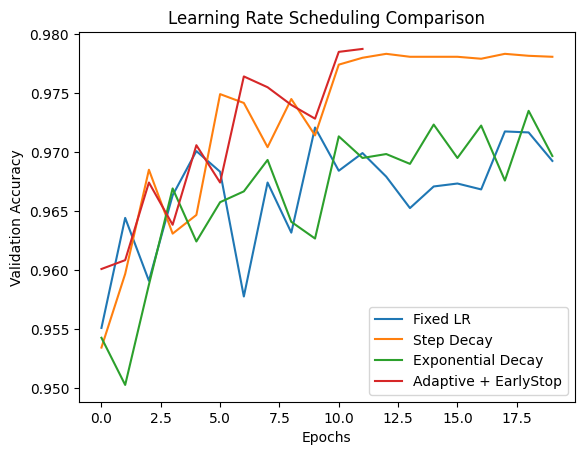

In [7]:
plt.plot(history_fixed.history['val_accuracy'], label='Fixed LR')
plt.plot(history_step.history['val_accuracy'], label='Step Decay')
plt.plot(history_exp.history['val_accuracy'], label='Exponential Decay')
plt.plot(history_adaptive.history['val_accuracy'], label='Adaptive + EarlyStop')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Learning Rate Scheduling Comparison")
plt.show()